# Investigating Fandango Movie Ratings

[Fandango](https://www.fandango.com/movie-reviews) is an online movie ratings aggregator. In October 2015, a data journalist named Walt Hickey analyzed movie ratings and found strong evidence to suggest that Fandango's rating system was biased and dishonest. He published his analysis [in this article](https://fivethirtyeight.com/features/fandango-movies-ratings/). Hickey found that there's a significant discrepancy between the number of stars displayed to users and the actual rating. The actual rating was almost always rounded up. And, in some situations, the rounding did not follow a normal pattern (a rating of 4 stars would be rounded up to 5 stars). There also was not a single movie rating under 2 stars.

Fandango's officials replied that the biased rounding was caused by a bug in their system rather than being intentional, and they promised to fix the bug as soon as possible. We are going to compare more recent data from Fandango to the dataset used in the article to see if it's actually been fixed.
* 2015 Data: [here](https://github.com/fivethirtyeight/data/tree/master/fandango)
* 2016-2017 Data: [here](https://github.com/mircealex/Movie_ratings_2016_17)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from random import sample
%matplotlib inline

In [2]:
# read in data
previous = pd.read_csv('fandango_score_comparison.csv')
after = pd.read_csv('movie_ratings_16_17.csv')

## Data Exploration

In [3]:
previous.head(8)

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Fandango_Stars,Fandango_Ratingvalue,RT_norm,RT_user_norm,...,IMDB_norm,RT_norm_round,RT_user_norm_round,Metacritic_norm_round,Metacritic_user_norm_round,IMDB_norm_round,Metacritic_user_vote_count,IMDB_user_vote_count,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,5.0,4.5,3.70,4.30,...,3.90,3.5,4.5,3.5,3.5,4.0,1330,271107,14846,0.5
1,Cinderella (2015),85,80,67,7.5,7.1,5.0,4.5,4.25,4.00,...,3.55,4.5,4.0,3.5,4.0,3.5,249,65709,12640,0.5
2,Ant-Man (2015),80,90,64,8.1,7.8,5.0,4.5,4.00,4.50,...,3.90,4.0,4.5,3.0,4.0,4.0,627,103660,12055,0.5
3,Do You Believe? (2015),18,84,22,4.7,5.4,5.0,4.5,0.90,4.20,...,2.70,1.0,4.0,1.0,2.5,2.5,31,3136,1793,0.5
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,3.5,3.0,0.70,1.40,...,2.55,0.5,1.5,1.5,1.5,2.5,88,19560,1021,0.5
5,The Water Diviner (2015),63,62,50,6.8,7.2,4.5,4.0,3.15,3.10,...,3.60,3.0,3.0,2.5,3.5,3.5,34,39373,397,0.5
6,Irrational Man (2015),42,53,53,7.6,6.9,4.0,3.5,2.10,2.65,...,3.45,2.0,2.5,2.5,4.0,3.5,17,2680,252,0.5
7,Top Five (2014),86,64,81,6.8,6.5,4.0,3.5,4.30,3.20,...,3.25,4.5,3.0,4.0,3.5,3.5,124,16876,3223,0.5


In [4]:
after.head(8)

,movie,year,metascore,imdb,tmeter,audience,fandango,n_metascore,n_imdb,n_tmeter,n_audience,nr_metascore,nr_imdb,nr_tmeter,nr_audience
0,10 Cloverfield Lane,2016,76,7.2,90,79,3.5,3.80,3.60,4.50,3.95,4.0,3.5,4.5,4.0
1,13 Hours,2016,48,7.3,50,83,4.5,2.40,3.65,2.50,4.15,2.5,3.5,2.5,4.0
2,A Cure for Wellness,2016,47,6.6,40,47,3.0,2.35,3.30,2.00,2.35,2.5,3.5,2.0,2.5
3,A Dog's Purpose,2017,43,5.2,33,76,4.5,2.15,2.60,1.65,3.80,2.0,2.5,1.5,4.0
4,A Hologram for the King,2016,58,6.1,70,57,3.0,2.90,3.05,3.50,2.85,3.0,3.0,3.5,3.0
5,A Monster Calls,2016,76,7.5,87,84,4.0,3.80,3.75,4.35,4.20,4.0,4.0,4.5,4.0
6,A Street Cat Named Bob,2016,54,7.4,77,79,4.5,2.70,3.70,3.85,3.95,2.5,3.5,4.0,4.0
7,Alice Through the Looking Glass,2016,34,6.2,30,50,4.0,1.70,3.10,1.50,2.50,1.5,3.0,1.5,2.5


## Adjusting Our Goal
The original goal of the project was to compare the movie ratings from the original dataset to a more recent rating of those movies on Fandango's website to see if the 'bug' has been fixed. However, after an initial glimpse of our dataset and checking out the <code>README.md</code> files, that won't be possible. Our more recent dataset (<code>after</code>) has ratings for movies that came out in 2016 and our original dataset was taken in 2015 so they don't have the same movies.

From here, either we collect new data or adjust the goal of the project. Tweaking our goal seems like the more time efficient option and there's still interesting insight to be found from our current data. The new goal will be to find out whether there are differences in ratings for popular movies in 2015 and popular movies in 2016.

## Popular Movies
We are interested in comparing *popular* movies. Before moving on, we need to define 'popular'. We'll use Hickey's benchmark and consider a movie popular if it has 30 fan ratings or more on Fandango's website. The only issue with this is that our 2016-2017 dataset does not include a column for rating count like the original dataset did. 

To make sure our <code>after</code> dataset is representative of popular movies, we'll take a random sample of 10 movies and manually check the Fandango website to ensure majority have 30 or more ratings.

In [5]:
# generating random sample
sample(list(after['movie']),10)

['Everybody Wants Some!!',
 'The Conjuring 2',
 'The Autopsy of Jane Doe',
 'The Girl on the Train',
 'The Confirmation',
 'Before I Fall',
 'Gods of Egypt',
 'Alice Through the Looking Glass',
 'The Duel',
 'The Darkness']

In [6]:
%%html 
<style> table {float:left}  </style>

### Results
 
| Movie | Rating Count |
|-------|--------------|
| Everybody Wants Some!! | 1,875 |
| The Conjuring 2 | 41,753 |
| The Autopsy of Jane Doe | 697 |
| The Girl on the Train | 2,365 |
| The Confirmation | 324 |
| Before I Fall | 1,236 |
| Gods of Egypt | 3,264 |
| Alice Through the Looking Glass | 1,424 |
| The Duel | 651 |
| The Darkness | 6,147 |

100% of the 10 random movies from our sample have above 30 ratings so we can conclude that this dataset is representative of our goal.

## Isolating Target Data
We can see from where we previewed the data above that 
* <code>previous</code> has movies from years other than 2015
* <code>after</code> has movies from 2016 and 2017  

We're only interested in comparing 2015 and 2016 ratings so we'll drop any ratings outside of those years.

In [7]:
# keep movie ratings from 2015
fandango_2015 = previous[previous['FILM'].str[-6:] == '(2015)']
# keep movie ratings from 2016
fandango_2016 = after[after['year']==2016]

Both datasets have columns that represent movie ratings for other rating sites and additional columns that won't be useful for our analysis. We'll drop the columns that not relevant to our goal.

In [8]:
fandango_2015 = previous[['FILM', 'Fandango_Stars', 'Fandango_Ratingvalue', 'Fandango_votes', 'Fandango_Difference']]
fandango_2016 = after[['movie', 'year', 'fandango']]

## Comparing Shapes of Distributions
Now that our datasets match our goal, we can begin comparing the differences between the movie ratings in 2015 vs 2016. We want to start off with a high level comparison between the shapes of the distributions.

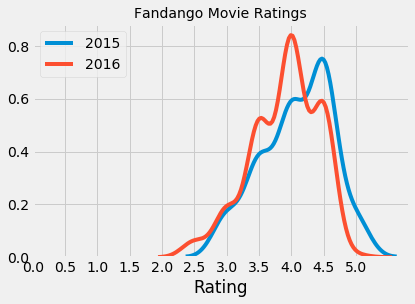

In [9]:
# plotting distributions from both datasets
plt.style.use('fivethirtyeight')
sns.kdeplot(fandango_2015['Fandango_Stars'],legend=False)
sns.kdeplot(fandango_2016['fandango'],legend=False)
plt.title('Fandango Movie Ratings', fontsize=14)
plt.xlabel('Rating')
plt.xticks([0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0]);
plt.legend(loc='upper left', labels=['2015', '2016'])

Both of the distributions above are left skewed, indicating mainly high ratings. There is a clear difference between the ratings of popular movies in 2015 compared to 2016. Overall, popular movies in 2016 tend to be rated slightly lower than 2015. In 2016, we see the most popular rating is 4 vs 2015 where it's 4.5. We see less 5 star ratings in 2016 as well. Neither distribution has ratings under 2.

## Comparing Frequency Tables
Now, we want to get a little more granular so we'll look at the frequency distribution tables. Since our datasets have different numbers of movies, we'll look at relative frequencies instead of absolute frequencies.

In [10]:
fandango_2015['Fandango_Stars'].value_counts(normalize=True).sort_index(ascending=False)

5.0    0.075342
4.5    0.376712
4.0    0.280822
3.5    0.184932
3.0    0.082192
Name: Fandango_Stars, dtype: float64

In [11]:
fandango_2016['fandango'].value_counts(normalize=True).sort_index(ascending=False)

5.0    0.004673
4.5    0.266355
4.0    0.383178
3.5    0.233645
3.0    0.084112
2.5    0.028037
Name: fandango, dtype: float64

The frequency tables enforces there is a clear difference. Some interesting things to point out are:
* Percentage of movie rated 4.5 or higher: 45% (2015), 25% (2016)
* Percentage of movies rated 3.5 or lower: 26% (2015), 35% (2016)
* Percentage of movies rated 4.0: 29% (2015), 40% (2016)

## Direction of the Difference
The direction of the difference between 2015 and 2016 is still a little cloudy. We'll take each distribution of movie ratings and compute its mean, median, and mode, and then compare these statistics to determine what they tell about the direction of the difference.

In [12]:
# compute mean, median, mode for 2015
mean15 = fandango_2015['Fandango_Stars'].mean()
med15 = fandango_2015['Fandango_Stars'].median()
mode15 = fandango_2015['Fandango_Stars'].mode()[0]

# compute mean, median, mode for 2016
mean16 = fandango_2016['fandango'].mean()
med16 = fandango_2016['fandango'].median()
mode16 = fandango_2016['fandango'].mode()[0]

# dataframe to compare summary statistics
df = pd.DataFrame([[mean15,mean16],[med15,med16],[mode15,mode16]], columns=[2015,2016], index=['Mean','Median','Mode'])
df

,2015,2016
Mean,4.089041,3.89486
Median,4.000000,4.00000
Mode,4.500000,4.00000


Text(0.5, 1.0, 'Comparing Summary Statistics: 2015 vs 2016')

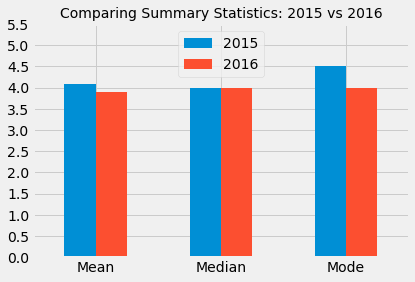

In [13]:
plt.style.use('fivethirtyeight')
df.plot.bar()
plt.yticks([x for x in np.arange(0,6,.5)]);
plt.xticks(rotation=0)
plt.legend(loc='upper center')
plt.title('Comparing Summary Statistics: 2015 vs 2016',fontsize=14)

The mean was slightly lower in 2016 (3.89) compared to 2015 (4.09) and the mode was .5 lower. The median was the same in both years. These summary statistics confirm the direction of change we saw on the kernel density plot: movie ratings in 2016 are slightly lower than movie ratings in 2015.

# Conclusion
In this project we compared Fandango ratings of popular movies in 2015 to the ratings of popular movies in 2016. We can conclude that, on average, the movie ratings in 2016 were slightly lower than they were in 2015. 

It is likely that this slight drop in movie ratings is due to Fandango fixing the bug that was pointed out by Walt Hickey's article. Or maybe they just made a stronger effort to disguise their bias; we can only speculate. 